In [1]:
from mnist import MNIST

In [2]:
data=MNIST(path="data/", return_type='numpy')
data.select_emnist('letters')
X,y=data.load_training()

In [3]:
X.shape, y.shape

((124800, 784), (124800,))

In [4]:
X=X.reshape(124800,28,28)
y=y.reshape(124800, 1)

In [5]:
list(y)

[array([23], dtype=uint8),
 array([7], dtype=uint8),
 array([16], dtype=uint8),
 array([15], dtype=uint8),
 array([23], dtype=uint8),
 array([17], dtype=uint8),
 array([13], dtype=uint8),
 array([11], dtype=uint8),
 array([22], dtype=uint8),
 array([24], dtype=uint8),
 array([10], dtype=uint8),
 array([14], dtype=uint8),
 array([18], dtype=uint8),
 array([21], dtype=uint8),
 array([26], dtype=uint8),
 array([21], dtype=uint8),
 array([21], dtype=uint8),
 array([24], dtype=uint8),
 array([19], dtype=uint8),
 array([5], dtype=uint8),
 array([2], dtype=uint8),
 array([25], dtype=uint8),
 array([9], dtype=uint8),
 array([5], dtype=uint8),
 array([10], dtype=uint8),
 array([21], dtype=uint8),
 array([11], dtype=uint8),
 array([24], dtype=uint8),
 array([12], dtype=uint8),
 array([1], dtype=uint8),
 array([17], dtype=uint8),
 array([9], dtype=uint8),
 array([1], dtype=uint8),
 array([24], dtype=uint8),
 array([18], dtype=uint8),
 array([1], dtype=uint8),
 array([8], dtype=uint8),
 array([4],

In [6]:
y=y-1

In [7]:
list(y)

[array([22], dtype=uint8),
 array([6], dtype=uint8),
 array([15], dtype=uint8),
 array([14], dtype=uint8),
 array([22], dtype=uint8),
 array([16], dtype=uint8),
 array([12], dtype=uint8),
 array([10], dtype=uint8),
 array([21], dtype=uint8),
 array([23], dtype=uint8),
 array([9], dtype=uint8),
 array([13], dtype=uint8),
 array([17], dtype=uint8),
 array([20], dtype=uint8),
 array([25], dtype=uint8),
 array([20], dtype=uint8),
 array([20], dtype=uint8),
 array([23], dtype=uint8),
 array([18], dtype=uint8),
 array([4], dtype=uint8),
 array([1], dtype=uint8),
 array([24], dtype=uint8),
 array([8], dtype=uint8),
 array([4], dtype=uint8),
 array([9], dtype=uint8),
 array([20], dtype=uint8),
 array([10], dtype=uint8),
 array([23], dtype=uint8),
 array([11], dtype=uint8),
 array([0], dtype=uint8),
 array([16], dtype=uint8),
 array([8], dtype=uint8),
 array([0], dtype=uint8),
 array([23], dtype=uint8),
 array([17], dtype=uint8),
 array([0], dtype=uint8),
 array([7], dtype=uint8),
 array([3], d

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

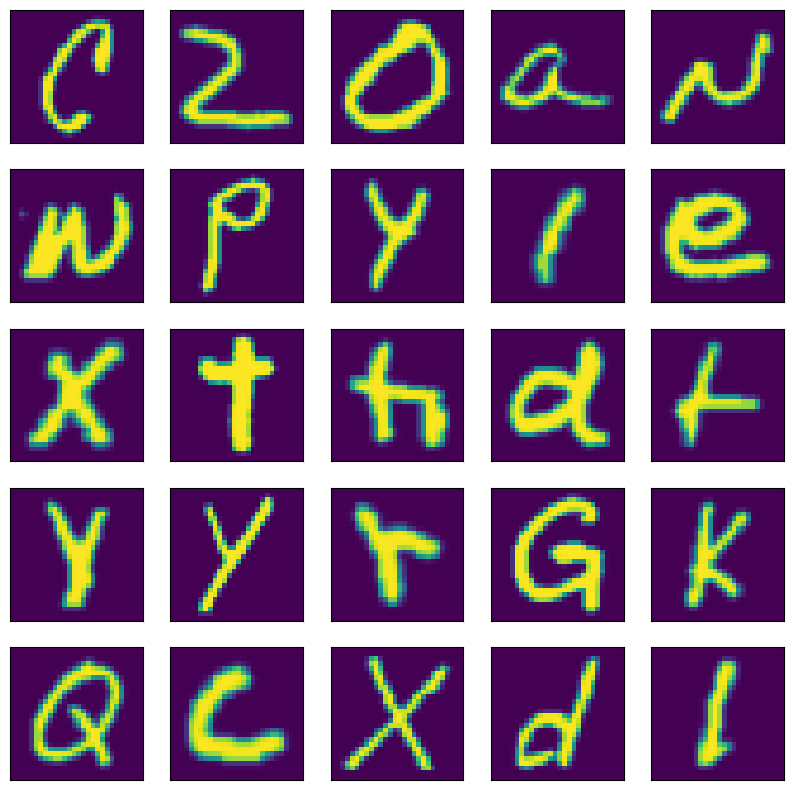

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid([False])
  plt.imshow(X_train[i])
plt.show()

In [11]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [12]:
y_train, y_test

(array([[ 2],
        [25],
        [14],
        ...,
        [12],
        [ 3],
        [12]], dtype=uint8),
 array([[ 9],
        [16],
        [10],
        ...,
        [ 5],
        [14],
        [25]], dtype=uint8))

In [13]:
from tensorflow import keras
import tensorflow as tf
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train, num_classes=26)
y_test = np_utils.to_categorical(y_test, num_classes=26)

In [15]:
y_train, y_test

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32))

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [17]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 26)                13338     
                                                                 
Total params: 677,914
Trainable params: 677,914
Non-trai

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
score=model.evaluate(X_test, y_test, verbose=0)
accuracy=100*score[1]
print("before training test accuracy is:", accuracy )

before training test accuracy is: 2.91266031563282


In [21]:
# Callbacks 
from keras.callbacks import ModelCheckpoint

# Model Checkpoint
checkpointer =ModelCheckpoint ("./Character", verbose=1, save_best_only=True)

In [22]:
model.fit(X_train,y_train, batch_size=120, epochs=10,
                  validation_split=0.2, callbacks=[checkpointer],
                  verbose=1, shuffle=True)

Epoch 1/10
666/666 [==============================] - ETA: 0s - loss: 0.7903 - accuracy: 0.7611
Epoch 1: val_loss improved from inf to 0.43110, saving model to .\Character


INFO:tensorflow:Assets written to: .\Character\assets


INFO:tensorflow:Assets written to: .\Character\assets


666/666 [==============================] - 29s 39ms/step - loss: 0.7903 - accuracy: 0.7611 - val_loss: 0.4311 - val_accuracy: 0.8642
Epoch 2/10
666/666 [==============================] - ETA: 0s - loss: 0.4223 - accuracy: 0.8661
Epoch 2: val_loss improved from 0.43110 to 0.34446, saving model to .\Character


INFO:tensorflow:Assets written to: .\Character\assets


INFO:tensorflow:Assets written to: .\Character\assets


666/666 [==============================] - 28s 42ms/step - loss: 0.4223 - accuracy: 0.8661 - val_loss: 0.3445 - val_accuracy: 0.8882
Epoch 3/10
665/666 [============================>.] - ETA: 0s - loss: 0.3390 - accuracy: 0.8883
Epoch 3: val_loss improved from 0.34446 to 0.32339, saving model to .\Character


INFO:tensorflow:Assets written to: .\Character\assets


INFO:tensorflow:Assets written to: .\Character\assets


666/666 [==============================] - 24s 36ms/step - loss: 0.3390 - accuracy: 0.8882 - val_loss: 0.3234 - val_accuracy: 0.8958
Epoch 4/10
666/666 [==============================] - ETA: 0s - loss: 0.2944 - accuracy: 0.9008
Epoch 4: val_loss improved from 0.32339 to 0.29553, saving model to .\Character


INFO:tensorflow:Assets written to: .\Character\assets


INFO:tensorflow:Assets written to: .\Character\assets


666/666 [==============================] - 27s 41ms/step - loss: 0.2944 - accuracy: 0.9008 - val_loss: 0.2955 - val_accuracy: 0.9046
Epoch 5/10
665/666 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.9093
Epoch 5: val_loss improved from 0.29553 to 0.29108, saving model to .\Character


INFO:tensorflow:Assets written to: .\Character\assets


INFO:tensorflow:Assets written to: .\Character\assets


666/666 [==============================] - 31s 46ms/step - loss: 0.2637 - accuracy: 0.9094 - val_loss: 0.2911 - val_accuracy: 0.9060
Epoch 6/10
665/666 [============================>.] - ETA: 0s - loss: 0.2430 - accuracy: 0.9157
Epoch 6: val_loss improved from 0.29108 to 0.27692, saving model to .\Character


INFO:tensorflow:Assets written to: .\Character\assets


INFO:tensorflow:Assets written to: .\Character\assets


666/666 [==============================] - 29s 44ms/step - loss: 0.2429 - accuracy: 0.9157 - val_loss: 0.2769 - val_accuracy: 0.9112
Epoch 7/10
665/666 [============================>.] - ETA: 0s - loss: 0.2217 - accuracy: 0.9220
Epoch 7: val_loss did not improve from 0.27692
666/666 [==============================] - 23s 35ms/step - loss: 0.2217 - accuracy: 0.9220 - val_loss: 0.2901 - val_accuracy: 0.9080
Epoch 8/10
665/666 [============================>.] - ETA: 0s - loss: 0.2050 - accuracy: 0.9269
Epoch 8: val_loss improved from 0.27692 to 0.27145, saving model to .\Character


INFO:tensorflow:Assets written to: .\Character\assets


INFO:tensorflow:Assets written to: .\Character\assets


666/666 [==============================] - 29s 43ms/step - loss: 0.2050 - accuracy: 0.9269 - val_loss: 0.2714 - val_accuracy: 0.9166
Epoch 9/10
666/666 [==============================] - ETA: 0s - loss: 0.1936 - accuracy: 0.9300
Epoch 9: val_loss did not improve from 0.27145
666/666 [==============================] - 24s 36ms/step - loss: 0.1936 - accuracy: 0.9300 - val_loss: 0.2800 - val_accuracy: 0.9135
Epoch 10/10
666/666 [==============================] - ETA: 0s - loss: 0.1818 - accuracy: 0.9335
Epoch 10: val_loss did not improve from 0.27145
666/666 [==============================] - 23s 35ms/step - loss: 0.1818 - accuracy: 0.9335 - val_loss: 0.2878 - val_accuracy: 0.9134


In [23]:
score=model.evaluate(X_test, y_test, verbose=0)
accuracy=100*score[1]
print("test accuracy is:", accuracy )

test accuracy is: 91.35817289352417


In [24]:
model.save('best_alpha_model.h5')